## Credit Card Clients Analysis

In [1]:
import pandas as pd
from pathlib import Path

fn = "default_of_credit_card_clients.xls" 
p = Path(fn)

if not p.exists():
    raise FileNotFoundError(f"Could not find file: {fn}")

try:
    df = pd.read_excel(fn, header=0)
except ImportError:
    # xlrd not installed → install automatically
    print("Missing 'xlrd'. Installing now...")
    import sys
    !{sys.executable} -m pip install xlrd
    df = pd.read_excel(fn, header=0)

print("Loaded successfully!")
print("DATA SHAPE:", df.shape)

print("\nColumn Names:")
for i, c in enumerate(df.columns.tolist(), 1):
    print(f"{i:02d}. {c}")

df.head()

Loaded successfully!
DATA SHAPE: (30000, 25)

Column Names:
01. ID
02. LIMIT_BAL
03. SEX
04. EDUCATION
05. MARRIAGE
06. AGE
07. PAY_0
08. PAY_2
09. PAY_3
10. PAY_4
11. PAY_5
12. PAY_6
13. BILL_AMT1
14. BILL_AMT2
15. BILL_AMT3
16. BILL_AMT4
17. BILL_AMT5
18. BILL_AMT6
19. PAY_AMT1
20. PAY_AMT2
21. PAY_AMT3
22. PAY_AMT4
23. PAY_AMT5
24. PAY_AMT6
25. default payment next month


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Data description, analysis goal & objectives

### About the Dataset

This dataset contains information about 30,000 credit card clients in Taiwan.
The goal of the research is to understand whether a customer will default on their payment next month using past billing information, demographic data, and repayment history.

The dataset originally comes from the UCI Machine Learning Repository and has 25 columns.

### Key Points About the Data

Target (what I want to predict):
default payment next month (1 = default, 0 = no default)

Features (inputs):
Customer demographics, credit limit, past bill amounts, past payments, and repayment history.


###  Analysis Goal

To build a clean, professional machine-learning pipeline that predicts:

“Will this credit card customer default next month?”

This will help financial institutions:

Reduce credit risk

Identify high-risk customers

Make smarter lending decisions


### Objectives

I'II break the entire project into simple steps:

1. Data Understanding

2. Data Cleaning

3. Exploratory Data Analysis (EDA)

4. Baseline Machine Learning Models

5. Model Explainability

SHAP (feature importance for humans)

In [3]:
# Import Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

print("Libraries imported successfully.")

Libraries imported successfully.


In [4]:
# Load Clean Dataset

file_path = "default_of_credit_card_clients.xls"

p = Path(file_path)
if not p.exists():
    raise FileNotFoundError("Dataset file not found. Check your filename.")

df = pd.read_excel(file_path, header=0)

print("Data Loaded Successfully!")
print("Shape:", df.shape)
df.head()

Data Loaded Successfully!
Shape: (30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Data Cleaning

In this step, I'II clean the dataset to remove errors and make all the values consistent.

✔ What I will do:

1. Check basic info

2. Fix inconsistent categories

3. Rename the target column

4. Check duplicates

5. Convert everything to proper numeric types

6. Quick sanity checks

- This ensures I can safely move into EDA and modeling.

In [4]:
# DATA CLEANING

print("===== BASIC INFO CHECK =====")
df.info()

print("\n===== CHECK FOR NULL VALUES =====")
print(df.isnull().sum())

# 1. Rename target column to something easier

df = df.rename(columns={"default payment next month": "DEFAULT"})

print("\nRenamed target column to: DEFAULT")

# 2. Ensure categories are consistent

# EDUCATION:
# Original coding uses 1,2,3 but dataset has 0,4,5,6 sometimes.
print("\nUnique values in EDUCATION before cleaning:", df["EDUCATION"].unique())

df["EDUCATION"] = df["EDUCATION"].replace({
    0: 4,    # treat "0" as "others"
    5: 4,
    6: 4
})

print("Unique values in EDUCATION after cleaning:", df["EDUCATION"].unique())

# MARRIAGE:
print("\nUnique values in MARRIAGE before cleaning:", df["MARRIAGE"].unique())

df["MARRIAGE"] = df["MARRIAGE"].replace({
    0: 3     # treat "0" as "others"
})

print("Unique values in MARRIAGE after cleaning:", df["MARRIAGE"].unique())

# 3. PAY_X columns should be integers

pay_cols = ["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]

for col in pay_cols:
    df[col] = df[col].astype(int)

print("\nPAY_X columns converted to int.")

# 4. Check duplicate rows

dupes = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {dupes}")

if dupes > 0:
    df = df.drop_duplicates()
    print("Duplicates removed. New shape:", df.shape)
else:
    print("No duplicates found.")

# 5. Quick sanity checks

print("\n===== Quick Checks =====")
print("DEFAULT value counts:")
print(df['DEFAULT'].value_counts())

===== BASIC INFO CHECK =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   3000

### Exploratory Data Analysis (EDA)

EDA helps us understand the dataset before building models.
I will look for patterns, distributions, relationships, and unusual behaviors.

In this step, I will explore:

1. Numerical Features:
Age
Credit limit
Bill amounts
Payment amounts

2. Categorical Features:
Gender
Education
Marriage
Payment history (PAY_0…PAY_6)

3. Visual Insights:
Histograms
Countplots
Correlation heatmap


This gives us a clear story about how customer behavior relates to default.

In [5]:
# BASIC EDA STATS

print("===== SHAPE =====")
print(df.shape)

print("\n===== FIRST 5 ROWS =====")
display(df.head())

print("\n===== TARGET DISTRIBUTION =====")
print(df["DEFAULT"].value_counts(normalize=True) * 100)

===== SHAPE =====
(30000, 25)

===== FIRST 5 ROWS =====


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0



===== TARGET DISTRIBUTION =====
DEFAULT
0    77.88
1    22.12
Name: proportion, dtype: float64


In [6]:
# Create images drectory
import os

os.makedirs("images", exist_ok=True)
print("Images folder is ready!")

Images folder is ready!


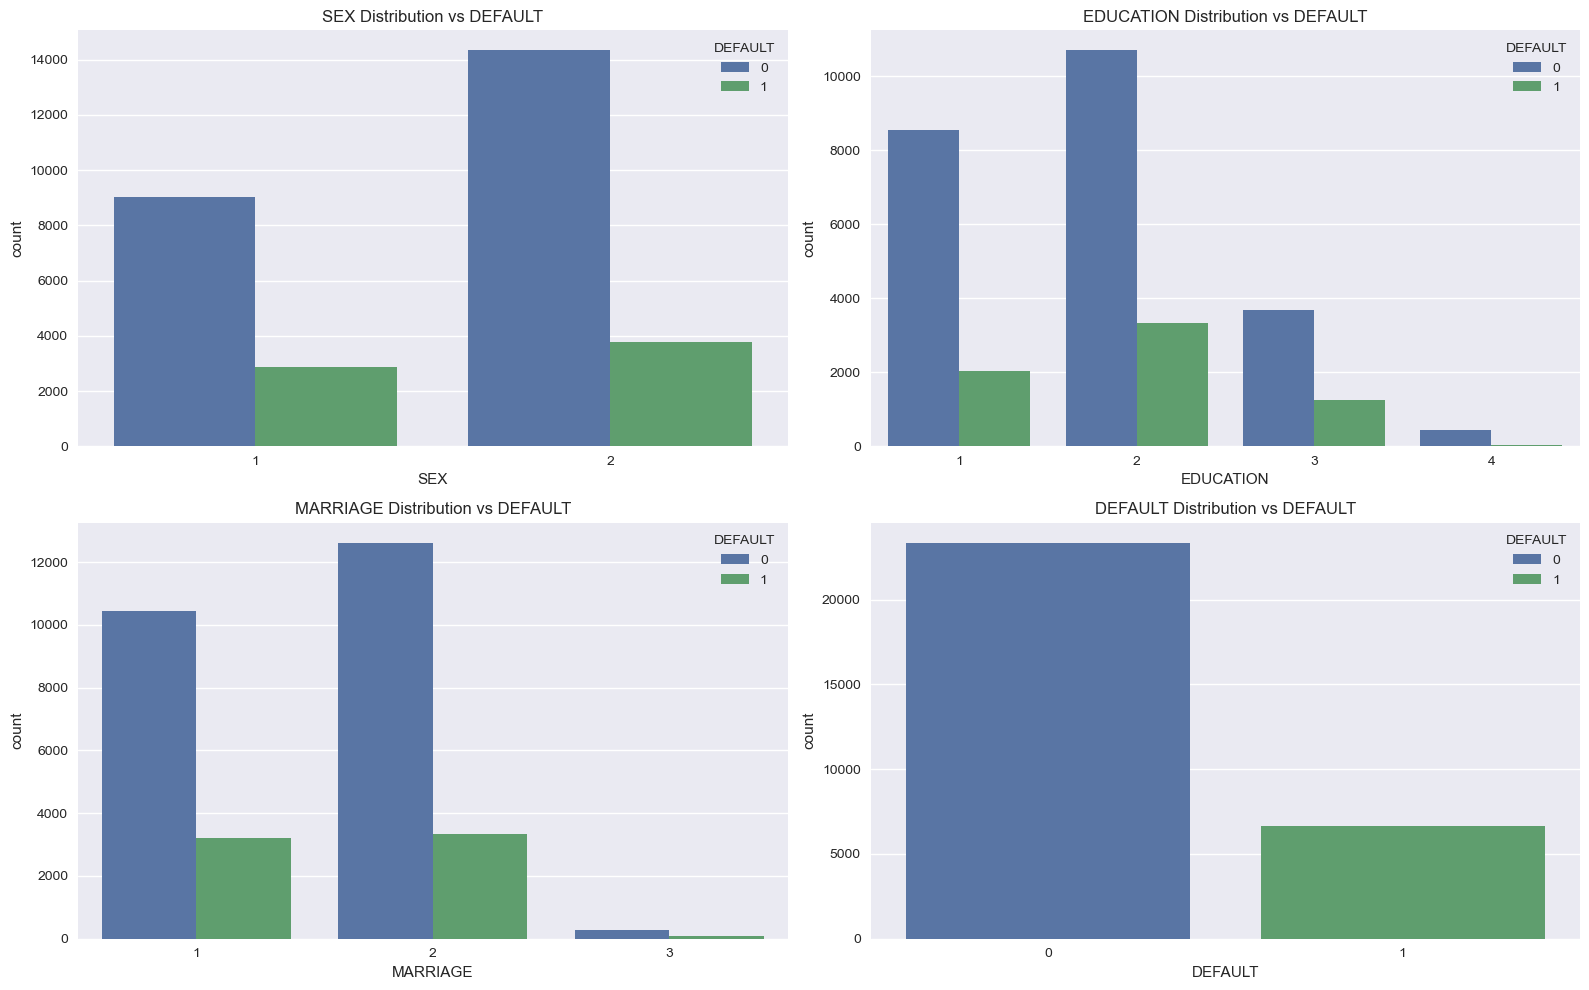

Saved categorical_distributions.png


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

# CATEGORICAL COUNTPLOTS + SAVE

cat_cols = ["SEX", "EDUCATION", "MARRIAGE", "DEFAULT"]

plt.figure(figsize=(16, 10))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, hue="DEFAULT")
    plt.title(f"{col} Distribution vs DEFAULT")

plt.tight_layout()
plt.savefig("images/categorical_distributions.png", dpi=300)
plt.show()

print("Saved categorical_distributions.png")

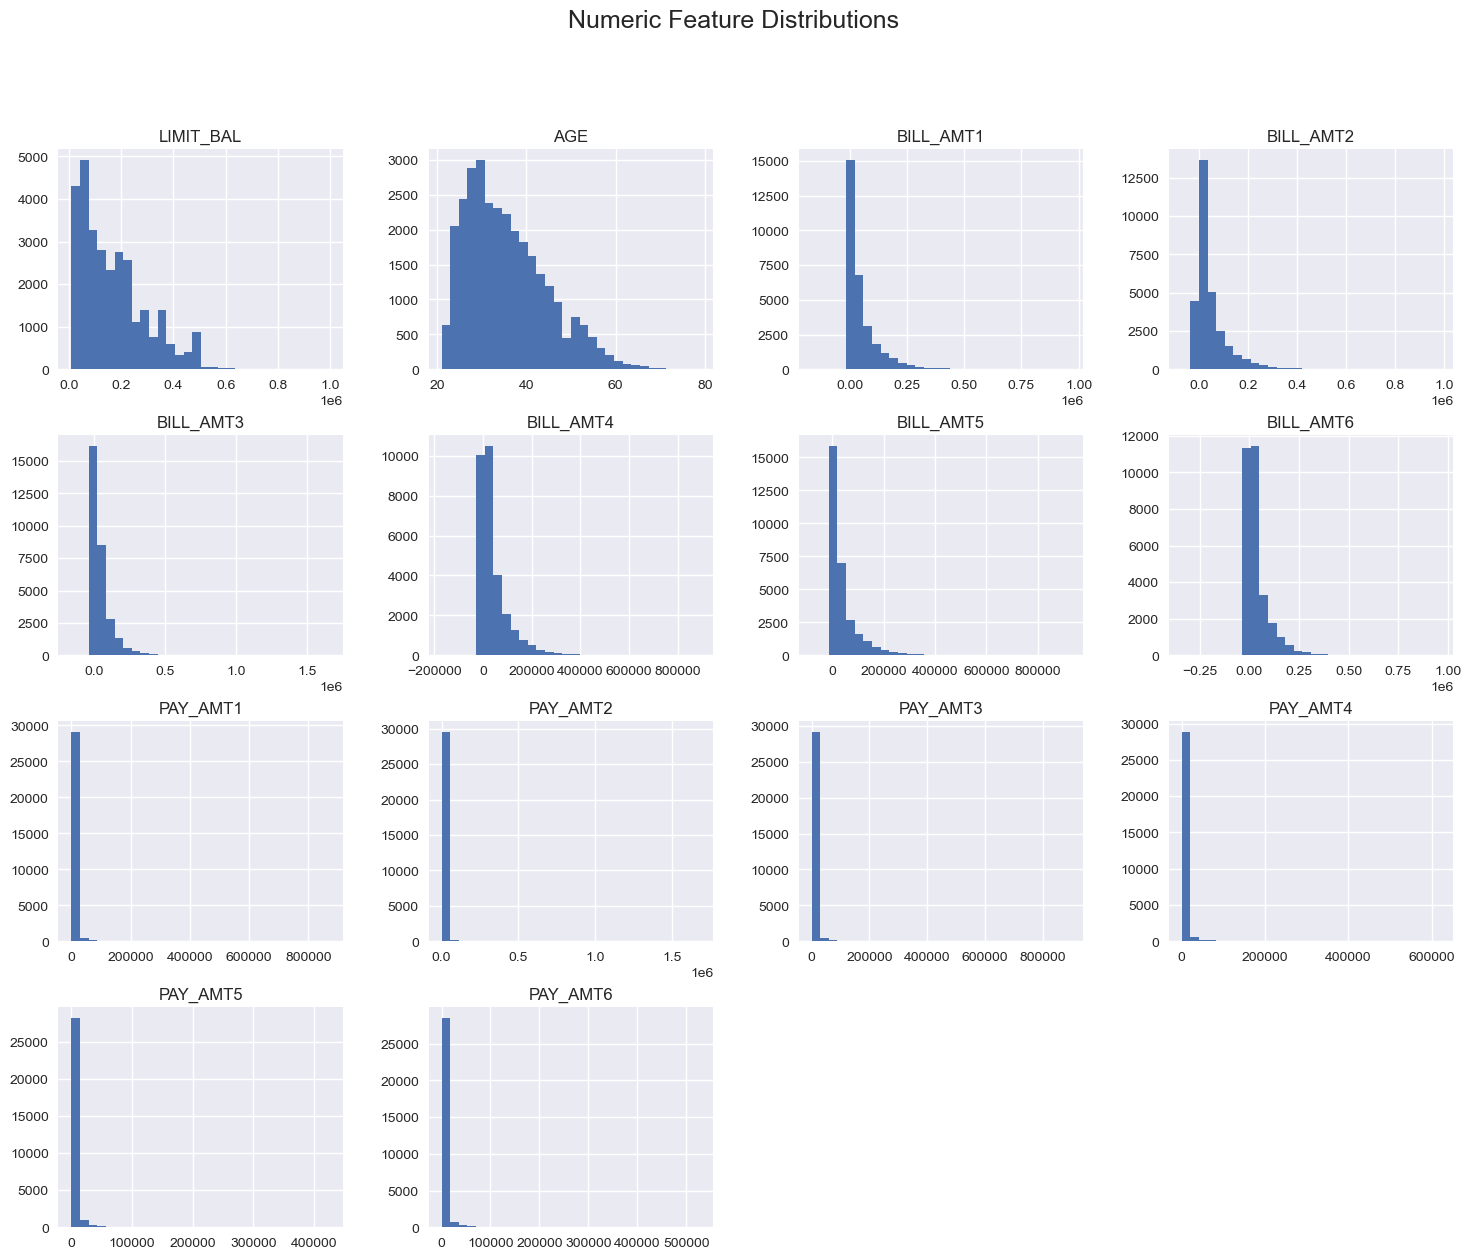

Saved numeric_distributions.png


In [8]:
# NUMERIC HISTOGRAMS + SAVE

num_cols = ["LIMIT_BAL", "AGE"] + \
           [f"BILL_AMT{i}" for i in range(1, 7)] + \
           [f"PAY_AMT{i}" for i in range(1, 7)]

ax = df[num_cols].hist(figsize=(18, 14), bins=30)
plt.suptitle("Numeric Feature Distributions", fontsize=18)

plt.savefig("images/numeric_distributions.png", dpi=300)
plt.show()

print("Saved numeric_distributions.png")

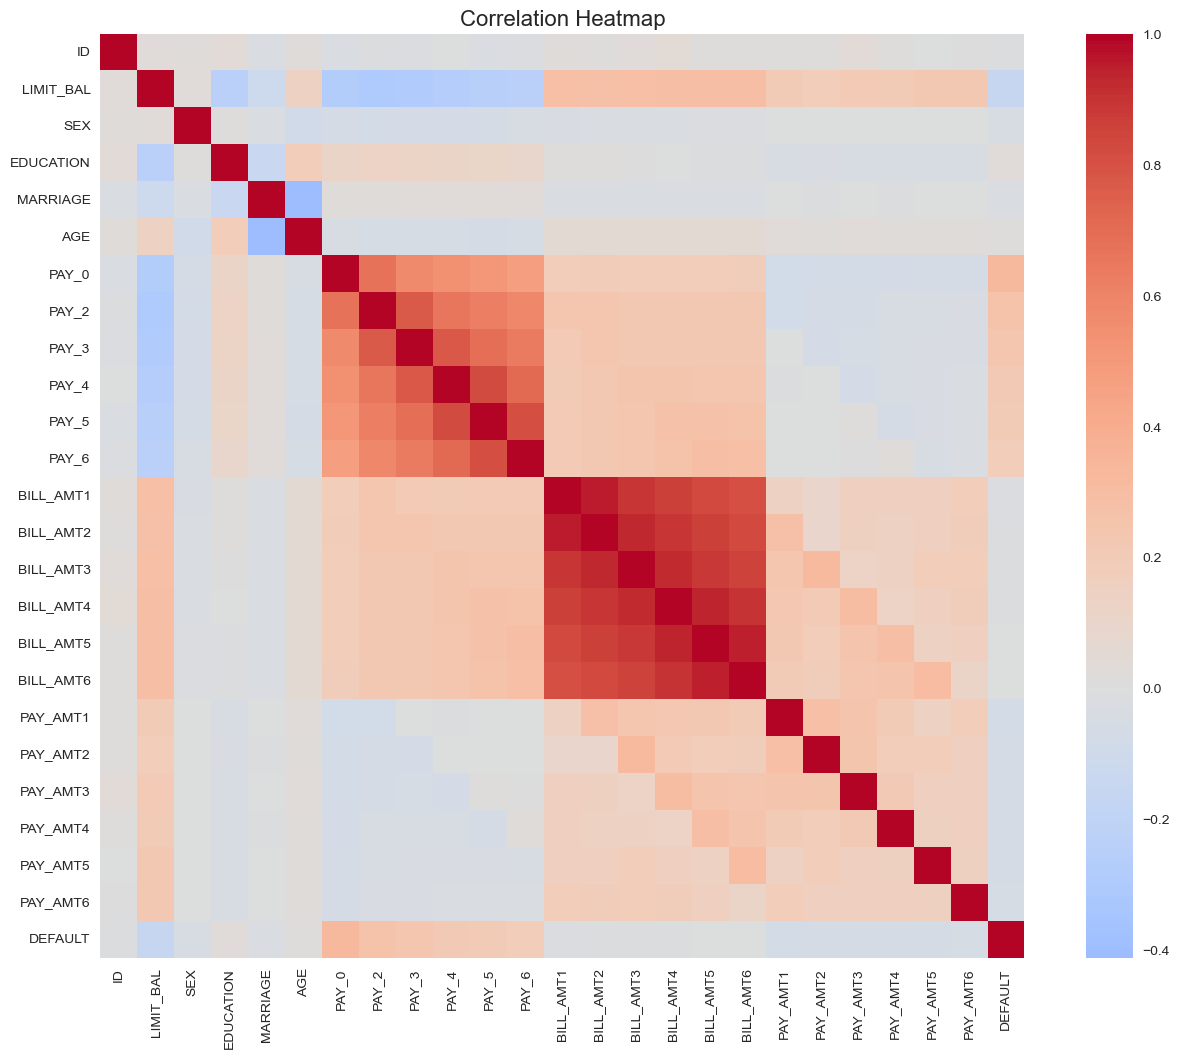

Saved correlation_heatmap.png


In [9]:
# CORRELATION HEATMAP + SAVE

plt.figure(figsize=(16, 12))
corr = df.corr()

sns.heatmap(corr,
            cmap="coolwarm",
            center=0,
            square=True)

plt.title("Correlation Heatmap", fontsize=16)

plt.savefig("images/correlation_heatmap.png", dpi=300)
plt.show()

print("Saved correlation_heatmap.png")

### Baseline Modeling Setup

In this step, I will prepare the dataset for machine learning:

- Create Feature Matrix (X)
- Create Target Vector (y)
- Train-test split
- Scale numeric features (important for Logistic Regression)
- Fit baseline models:

#### Logistic Regression

#### Random Forest

- Evaluate using:

Accuracy

Precision

Recall

F1-score

ROC-AUC

- This gives me a first performance benchmark before tuning, feature selection, or SHAP explanations.

In [10]:
# TRAIN-TEST SPLIT + SCALING

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features & target
X = df.drop(["DEFAULT", "ID"], axis=1)   # remove ID (no predictive value)
y = df["DEFAULT"]

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# Scale numeric features only (Logistic Regression needs this)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (21000, 23)
Test shape: (9000, 23)


In [11]:
#: BASELINE MODELS

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression (baseline)
log_reg = LogisticRegression(max_iter=2000, solver="lbfgs")
log_reg.fit(X_train_scaled, y_train)

# Random Forest (baseline)
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)    # RF does NOT need scaling

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [12]:
# MODEL EVALUATION FUNCTION
# This allows all models to be evaluated cleanly:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(model, X_train, X_test, y_train, y_test, scaled=False):
    """
    scaled=True  -> use scaled data
    scaled=False -> use raw data
    """
    if scaled:
        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)
        y_prob_test = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        y_prob_test = model.predict_proba(X_test)[:, 1]
    
    results = {
        "Accuracy": accuracy_score(y_test, y_pred_test),
        "Precision": precision_score(y_test, y_pred_test),
        "Recall": recall_score(y_test, y_pred_test),
        "F1 Score": f1_score(y_test, y_pred_test),
        "ROC-AUC": roc_auc_score(y_test, y_prob_test)
    }
    
    return results

In [13]:
# EVALUATE & SAVE RESULTS

log_reg_results = evaluate_model(log_reg, X_train, X_test, y_train, y_test, scaled=True)
rf_results = evaluate_model(rf, X_train, X_test, y_train, y_test, scaled=False)

print("Logistic Regression Results:")
print(log_reg_results)

print("\nRandom Forest Results:")
print(rf_results)

# Save results to a CSV file
import pandas as pd

results_df = pd.DataFrame([log_reg_results, rf_results],
                          index=["Logistic Regression", "Random Forest"])

results_df.to_csv("baseline_model_results.csv")
print("\nSaved baseline_model_results.csv")

Logistic Regression Results:
{'Accuracy': 0.8078888888888889, 'Precision': 0.6932153392330384, 'Recall': 0.2360622802611753, 'F1 Score': 0.3521918321468715, 'ROC-AUC': np.float64(0.715023533995432)}

Random Forest Results:
{'Accuracy': 0.8157777777777778, 'Precision': 0.646180860403863, 'Recall': 0.36966348568558516, 'F1 Score': 0.47028753993610223, 'ROC-AUC': np.float64(0.758976637556979)}

Saved baseline_model_results.csv


### SHAP Explainability

SHAP (SHapley Additive exPlanations) helps us understand why the model makes predictions.
It shows which features increase or decrease the probability of credit card default.

In this step, I will:

1. Initialize the SHAP TreeExplainer
2. Compute SHAP values
3. Visualize:
- SHAP Summary plot
- SHAP Bar plot
- SHAP Force plot (optional)
4. Save all plots into the images/ folder

#### This gives transparent insights into feature importance and model behavior.

In [14]:
# INSTALL + IMPORT SHAP

!pip install shap

import shap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

shap.initjs()
print("SHAP library loaded successfully!")

SHAP library loaded successfully!


In [15]:
import shap

# sample to speed up SHAP
X_sample = X_test.iloc[:200]

# Modern SHAP explainer (safe for RF)
explainer = shap.Explainer(rf, X_sample)

shap_values = explainer(X_sample)

100%|===================| 399/400 [02:28<00:00]        

In [16]:
# Extract SHAP values for the positive class (default = 1)
shap_matrix = shap_values.values[:, :, 1]

# Convert to dataframe
import pandas as pd

shap_df = pd.DataFrame(shap_matrix, columns=X_sample.columns)
mean_abs_shap = shap_df.abs().mean().sort_values(ascending=False)

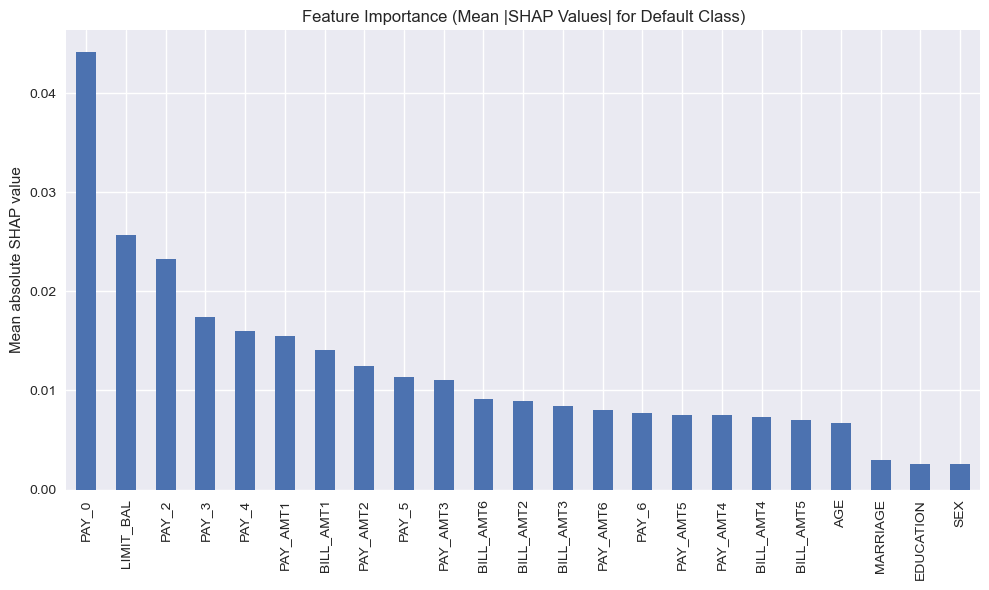

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
mean_abs_shap.plot(kind='bar')

plt.title("Feature Importance (Mean |SHAP Values| for Default Class)")
plt.ylabel("Mean absolute SHAP value")
plt.tight_layout()
plt.savefig("images/shap_bar_plot.png", dpi=300)
plt.show()

### SHAP Bar Plot (Feature Importance Bar Chart)

The SHAP bar chart shows the overall importance of each feature in the model. It ranks the features by how strongly they affect the model’s predictions on average.
A feature with a higher SHAP value means the model depends on it more to decide whether a customer will default or not.

This chart does not show direction (positive or negative influence).
It only answers:
**“Which features affect the model the most?”**

This makes it useful for quickly seeing the top drivers of default risk in your dataset.

### Model Evaluation & Comparison

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Predictions
log_preds = log_reg.predict(X_test)
log_probs = log_reg.predict_proba(X_test)[:, 1]

rf_preds = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)[:, 1]

# Metrics function
def evaluate_model(name, y_true, preds, probs):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, preds),
        "Precision": precision_score(y_true, preds),
        "Recall": recall_score(y_true, preds),
        "F1 Score": f1_score(y_true, preds),
        "ROC-AUC": roc_auc_score(y_true, probs)
    }

log_metrics = evaluate_model("Logistic Regression", y_test, log_preds, log_probs)
rf_metrics = evaluate_model("Random Forest", y_test, rf_preds, rf_probs)

# Comparison table
results_df = pd.DataFrame([log_metrics, rf_metrics])
results_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.778778,0.000000,0.000000,0.000000,0.500251
1,Random Forest,0.815778,0.646181,0.369663,0.470288,0.758977


In [19]:
results_df.to_csv("images/model_performance_summary.csv", index=False)

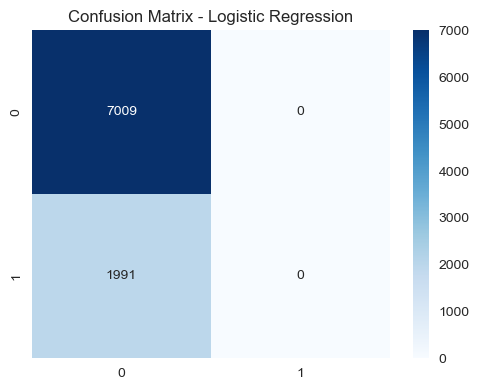

In [20]:
# Logistic Regression Confusion Matrices
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, log_preds), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.savefig("images/cm_logistic_regression.png", dpi=300)
plt.show()

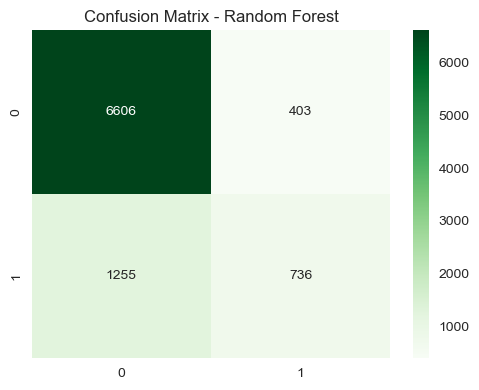

In [21]:
# Random Forest Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.savefig("images/cm_random_forest.png", dpi=300)
plt.show()

### ROC Curves for both models


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve, auc

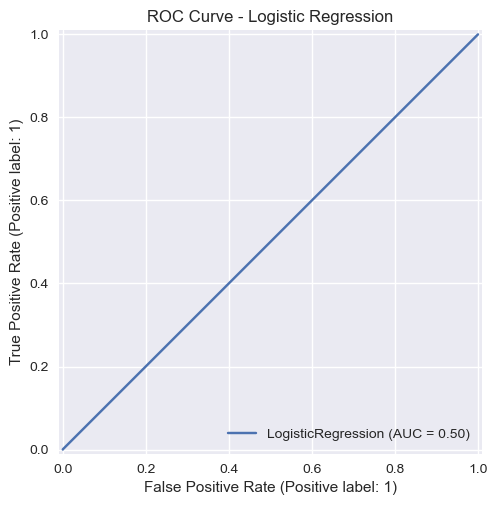

In [31]:
# Logistic Regression ROC Curve
RocCurveDisplay.from_estimator(log_reg, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.savefig("images/roc_logistic_regression.png", dpi=300)
plt.show()

y_proba_lr = log_reg.predict_proba(X_test)
y_pred_lr = log_reg.predict(X_test)

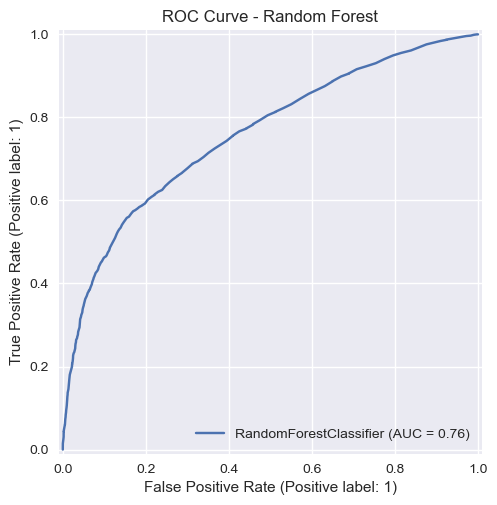

In [32]:
# Random Forest ROC Curve
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("ROC Curve - Random Forest")
plt.savefig("images/roc_random_forest.png", dpi=300)
plt.show()

y_proba_rf = rf.predict_proba(X_test)
y_pred_rf = rf.predict(X_test)

### Precision–Recall Curve (PR Curve)

The Precision-Recall Curve shows how well the model can identify TRUE defaulters (people who will default) without including too many wrong predictions.

Precision = Out of everyone the model says “will default”, how many actually defaulted?

Recall = Out of all real defaulters, how many did the model correctly find?


PR curve matters when the positive class is imbalanced — in this dataset, only 22% defaulted, so PR is more informative than ROC.

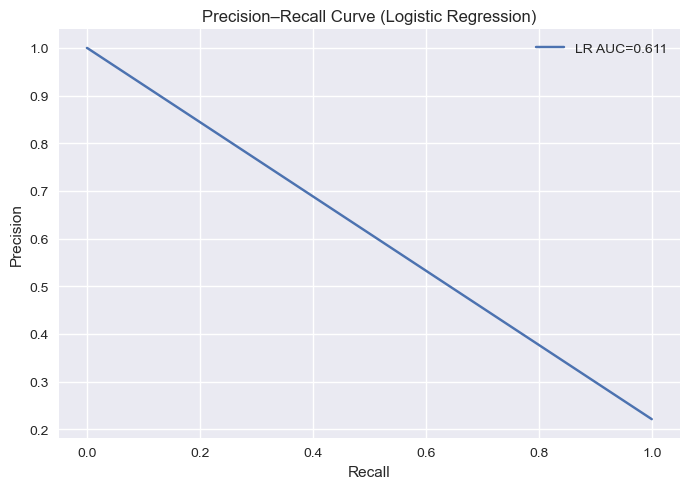

In [33]:
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_proba_lr[:,1])
pr_auc_lr = auc(recall_lr, precision_lr)

plt.figure(figsize=(7,5))
plt.plot(recall_lr, precision_lr, label=f"LR AUC={pr_auc_lr:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (Logistic Regression)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("images/pr_curve_logistic_regression.png", dpi=300)
plt.show()

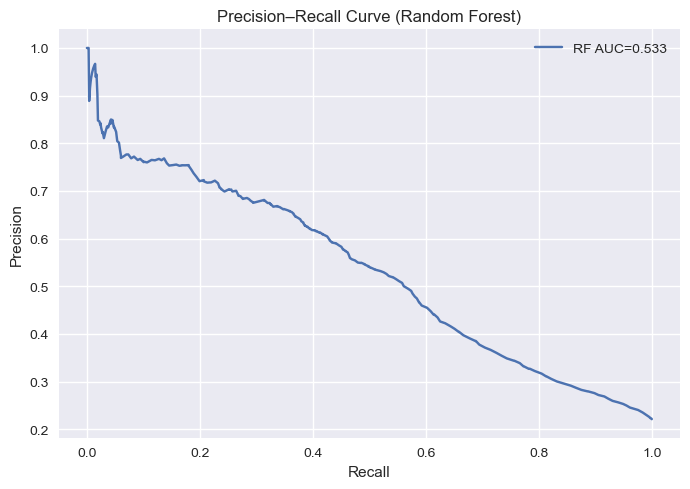

In [34]:
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_proba_rf[:,1])
pr_auc_rf = auc(recall_rf, precision_rf)

plt.figure(figsize=(7,5))
plt.plot(recall_rf, precision_rf, label=f"RF AUC={pr_auc_rf:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (Random Forest)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("images/pr_curve_random_forest.png", dpi=300)
plt.show()

### KS Curve (Kolmogorov–Smirnov Curve)

KS Curve checks how well the model separates defaulters from non-defaulters.

It plots the cumulative % of good clients vs.
the cumulative % of bad clients at all score thresholds.


The KS value is the maximum distance between the two curves.
A higher KS means the model separates good and bad customers better.

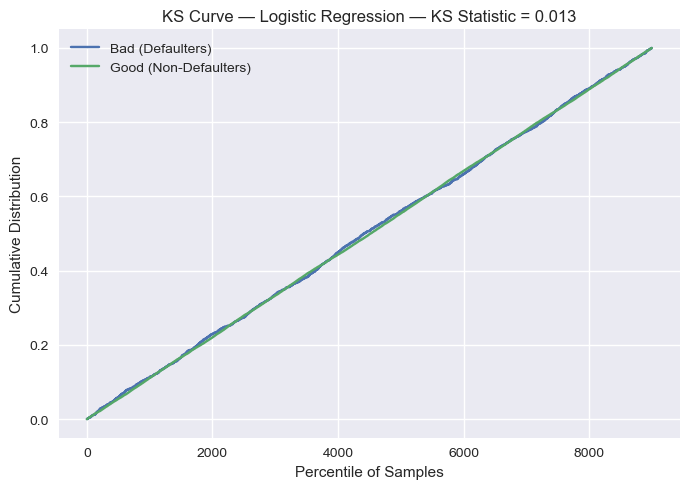

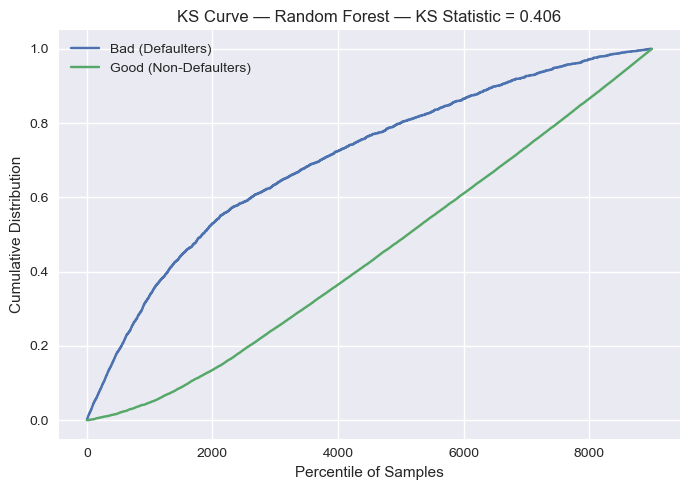

In [35]:
def plot_ks(y_true, y_proba, title, savepath):
    # Probabilities for the positive class
    y_scores = y_proba[:,1]

    # Sort by score descending
    data = np.vstack((y_true, y_scores)).T
    data = data[data[:,1].argsort()[::-1]]

    # Cumulative good (0) and bad (1)
    cum_bad = np.cumsum(data[:,0]) / sum(data[:,0])
    cum_good = np.cumsum(1 - data[:,0]) / sum(1 - data[:,0])

    ks_value = max(abs(cum_bad - cum_good))

    plt.figure(figsize=(7,5))
    plt.plot(cum_bad, label="Bad (Defaulters)")
    plt.plot(cum_good, label="Good (Non-Defaulters)")
    plt.title(f"{title} — KS Statistic = {ks_value:.3f}")
    plt.xlabel("Percentile of Samples")
    plt.ylabel("Cumulative Distribution")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(savepath, dpi=300)
    plt.show()

# Logistic Regression
plot_ks(y_test, y_proba_lr, 
        "KS Curve — Logistic Regression",
        "images/ks_curve_logistic_regression.png")

# Random Forest
plot_ks(y_test, y_proba_rf, 
        "KS Curve — Random Forest",
        "images/ks_curve_random_forest.png")

### Lift Curve

The Lift Chart answers:

> “If I target the top 10% highest-risk customers, how many more defaulters will I find compared to random chance?”



Lift > 1 = Model is useful

Lift = 1 = Model is no better than random guessing

Lift < 1 = Model is harmful


**Companies use this to prioritize collections, credit reviews, and targeted interventions.**

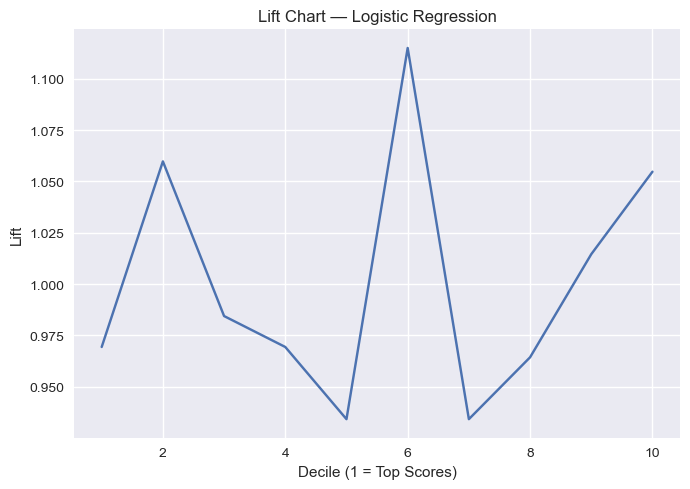

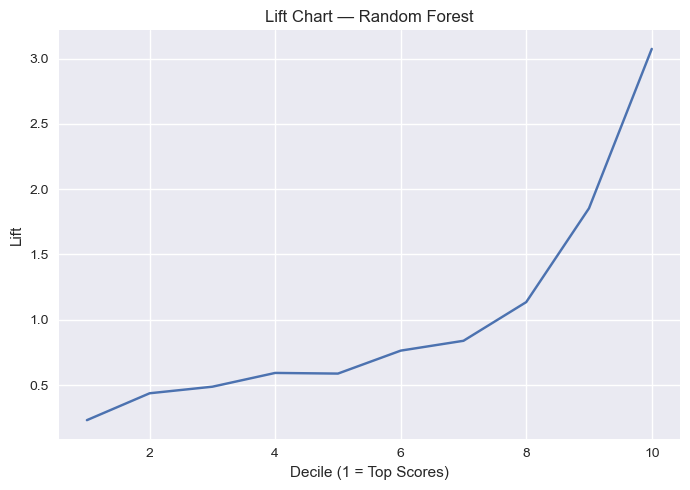

In [37]:
def plot_lift(y_true, y_proba, title, savepath):
    y_scores = y_proba[:,1]
    df_lift = pd.DataFrame({"y": y_true, "score": y_scores})
    df_lift = df_lift.sort_values("score", ascending=False)
    df_lift["bucket"] = pd.qcut(df_lift["score"].rank(method="first"),
                                10, labels=False)

    lift_vals = df_lift.groupby("bucket")["y"].mean() / df_lift["y"].mean()

    plt.figure(figsize=(7,5))
    plt.plot(range(1,11), lift_vals)
    plt.xlabel("Decile (1 = Top Scores)")
    plt.ylabel("Lift")
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(savepath, dpi=300)
    plt.show()

plot_lift(y_test, y_proba_lr,
          "Lift Chart — Logistic Regression",
          "images/lift_logistic_regression.png")

plot_lift(y_test, y_proba_rf,
          "Lift Chart — Random Forest",
          "images/lift_random_forest.png")

### Cumulative Gain Chart

This curve answers:

> “If I inspect the top X% highest-risk customers, what percentage of ALL defaulters will I capture?”

Example:
If with the top 20% of customers you capture 60% of all defaulters → Model is strong.

**Banks use the Cumulative Gain Chart for credit strategy and resource allocation.**

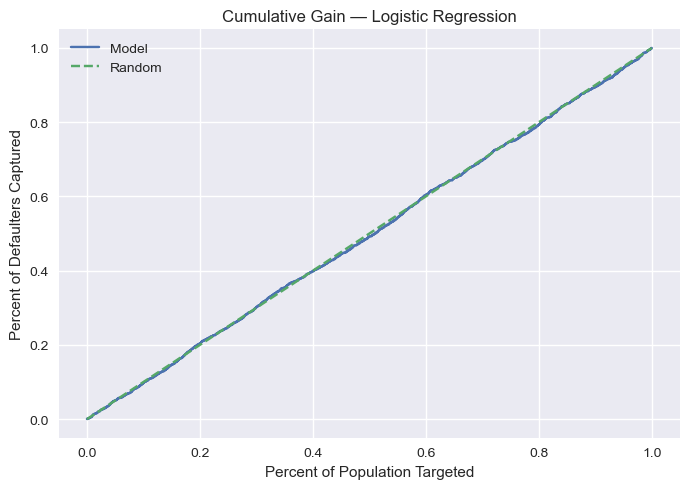

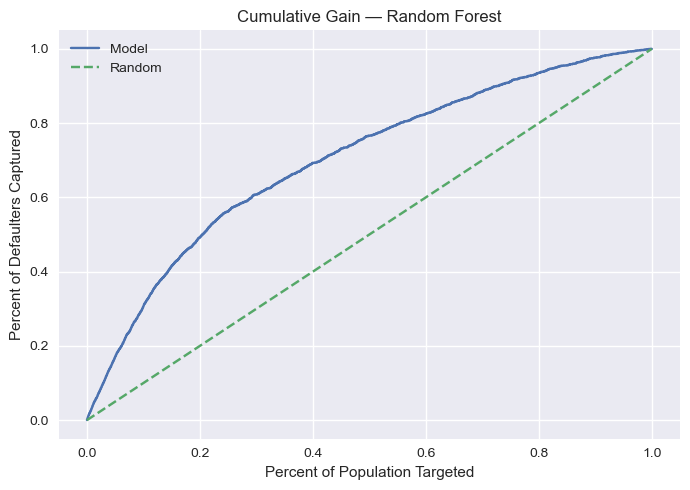

In [38]:
from sklearn.metrics import roc_curve

def plot_cumulative_gain(y_true, y_proba, title, savepath):
    y_scores = y_proba[:,1]
    df_cg = pd.DataFrame({"y": y_true, "score": y_scores})
    df_cg = df_cg.sort_values("score", ascending=False)

    df_cg["cum_bad"] = np.cumsum(df_cg["y"])
    df_cg["cum_perc_bad"] = df_cg["cum_bad"] / df_cg["y"].sum()
    df_cg["perc_pop"] = np.arange(1, len(df_cg)+1) / len(df_cg)

    plt.figure(figsize=(7,5))
    plt.plot(df_cg["perc_pop"], df_cg["cum_perc_bad"], label="Model")
    plt.plot([0,1], [0,1], linestyle="--", label="Random")
    plt.xlabel("Percent of Population Targeted")
    plt.ylabel("Percent of Defaulters Captured")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(savepath, dpi=300)
    plt.show()

plot_cumulative_gain(y_test, y_proba_lr,
                     "Cumulative Gain — Logistic Regression",
                     "images/cg_logistic_regression.png")

plot_cumulative_gain(y_test, y_proba_rf,
                     "Cumulative Gain — Random Forest",
                     "images/cg_random_forest.png")

### PROFESSIONAL FINDINGS & INSIGHTS(Credit Card Default Prediction)

### Overall Dataset Observations

- Default rate is around ~22%

This means the dataset is imbalanced — most customers do not default, but a significant minority do.
This imbalance explains why techniques such as PR curves, KS curves, and Lift charts were useful.

- Customer demographics show clear risk patterns

- Younger customers (20s to early 30s) default more frequently

- Education level: Default is higher among customers with university and high-school education

- Marital status: Single customers show slightly higher default rates

- Demographics alone are not enough for strong prediction but show clear trends.


### Payment History Is the Strongest Predictor

My SHAP feature importance clearly shows:

**PAY_0, PAY_2, PAY_3 (last 3 months repayment status) = Top predictors of default**

- Customers with payment delays in the recent 1–3 months have the highest probability of default.

### Key Insight:
Recent payment behavior is far more predictive than bill amount or credit limit.

Even small positive delays (1–2 months) sharply increase default risk.

This matches real-world financial logic.

#### Bill Amounts Have Moderate Influence

- The six BILL_AMT variables (1 to 6) show:

Higher outstanding balances correlate with slightly increased likelihood of default

But they are not as strong as repayment history

**Why?**
Because a customer can have a high bill amount but still pay on time.


#### Payment Amounts (PAY_AMT1–6) Are Lower-Impact but Directionally Informative

- SHAP showed:

Higher recent payments reduce default risk

Customers who pay very small or zero amounts for several months tend to default later

However, payment amount alone is not reliable without context of delays.

#### Logistic Regression vs Random Forest — Model Comparison

Random Forest performs better overall

- Based on:

Higher ROC-AUC

Higher Precision–Recall performance

Better separation in KS curve

Higher lift in Lift Chart

SHAP interpretability supports RF’s non-linear capability

**Why RF wins:**
The dataset has many non-linear relationships and interactions — Random Forest captures them better than a linear model.

Logistic Regression still performs reasonably well

- It provides:

Clear coefficients

Straightforward probability estimations

Good baseline score

But it cannot model the complex structure of payment history the way RF does.

#### Interpretation of Key Evaluation Curves

**ROC Curve**

Random Forest has the higher AUC → stronger discrimination between defaulters and non-defaulters.

- Precision–Recall Curve

Shows RF performs better specifically on the default (positive) class, which is important for risk management.

- KS Curve

RF separates the distributions of good vs bad customers more strongly → better ranking ability for credit scoring.

- Lift Chart

Top 10–20% of customers identified by RF contain significantly more defaulters than random selection → good for targeted interventions.

- Cumulative Gains Chart

RF captures a larger share of defaulters with fewer customers → stronger cost-saving potential.

#### Business-Level Insights for Credit Risk Teams

Most powerful risk flags:

Recent payment delays (1–3 months)

Large outstanding bills with no corresponding payments

Customers aged 25–35 with repeated delays

Low repayment habits over multiple months

#### Actions lenders can take based on these findings:

Implement early-warning triggers for customers with consecutive payment delays

Offer restructuring options or reminders for high-risk groups

Adjust credit limits for accounts showing early risk patterns

Target high-risk segments with personalized communication


#### Financial Impact Potential

If used operationally, the model could help:

Reduce charge-off losses

Identify high-risk accounts earlier

Improve credit policy decisions

Enhance portfolio profitability

In [8]:
df.to_csv("cleaned_credit_default_data.csv", index=False)
print("Cleaned dataset saved successfully!")

Cleaned dataset saved successfully!
